### Introduction

Imagine that you work for a financial institution and part of your job is to build a model that predicts if a credit card transaction is fraudulent or not. You can model the problem as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).

You have access to transactions that occured over a certain period of time. The majority of the transactions are normally legitimate and only a small fraction are non-legitimate. Thus, typically you have access to a dataset that is highly unbalanced. This is also the case of the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.172% of all transactions).

This is a Kaggle dataset. You can find this "Credit Card Fraud Detection" dataset from the following link: Credit Card Fraud Detection.

To train the model, you can use part of the input dataset, while the remaining data can be utilized to assess the quality of the trained model. First, let's import the necessary libraries and download the dataset.


### Objectives
- Perform basic data preprocessing in Python
- Model a classification task using the Scikit-Learn Python APIs
- Train Suppport Vector Machine and Decision Tree models using Scikit-Learn
- Run inference and assess the quality of the trained models

#### Flow
- Import libraries
- Import data
- Understand the data
- Preprocess the data
- Split data into training set and test set
- Model development for decision tree and SVM
- Evaluate the models

##### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score

##### Import data

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
raw_data = pd.read_csv(url)
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


##### Understand data

<AxesSubplot:>

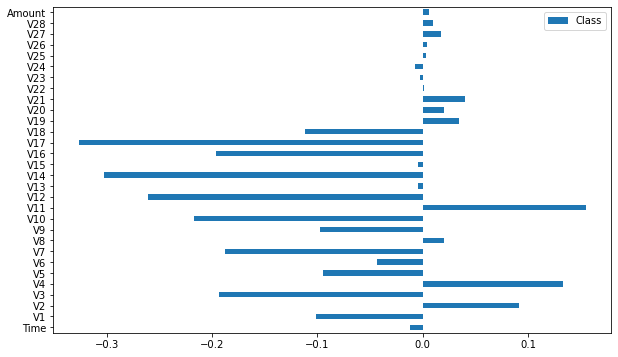

In [3]:
# raw_data.info()  # All columns are numeric data
# raw_data.isnull().sum()  # No null value. Thus, no missing data
raw_data['Class'].value_counts()  
# See imbalance class. only 492 frauds out of 284807 data --> Need to balance the weight 

raw_data_corr = raw_data.corr()[['Class']].drop('Class')
raw_data_corr.plot(kind='barh', figsize=(10,6))

##### Preprocess the data

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(1, 0, 'V1'),
  Text(2, 0, 'V2'),
  Text(3, 0, 'V3'),
  Text(4, 0, 'V4'),
  Text(5, 0, 'V5'),
  Text(6, 0, 'V6'),
  Text(7, 0, 'V7'),
  Text(8, 0, 'V8'),
  Text(9, 0, 'V9'),
  Text(10, 0, 'V10'),
  Text(11, 0, 'V11'),
  Text(12, 0, 'V12'),
  Text(13, 0, 'V13'),
  Text(14, 0, 'V14'),
  Text(15, 0, 'V15'),
  Text(16, 0, 'V16'),
  Text(17, 0, 'V17'),
  Text(18, 0, 'V18'),
  Text(19, 0, 'V19'),
  Text(20, 0, 'V20'),
  Text(21, 0, 'V21'),
  Text(22, 0, 'V22'),
  Text(23, 0, 'V23'),
  Text(24, 0, 'V24'),
  Text(25, 0, 'V25'),
  Text(26, 0, 'V26'),
  Text(27, 0, 'V27'),
  Text(28, 0, 'V28'),
  Text(29, 0, 'Amount')])

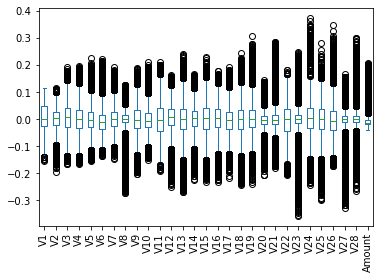

In [4]:
# time is not related to the prediction in this case. Remove time column for x
x = raw_data.iloc[:, 1:30]
y = raw_data['Class']

# From box plot, we can see each column has different range. Thus, it is better to normalize them within fixed range
# x.plot(kind='box')

# Normalize x data into fixed range. We also need to use normalize() to bring samples the length 1
scaler = StandardScaler()
x_standard = scaler.fit_transform(x)
x_process = normalize(x_standard, norm='l1')
x_process_df = pd.DataFrame(x_process)
x_process_df.columns = x.columns

x_process_df.plot(kind='box')
plt.xticks(rotation=90)

##### Split the data to training set and test set

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_process_df,y, test_size=0.3, random_state=42)
# print(x_train.shape)
# print(x_test.shape)

##### Model development for decision tree and SVM

In [19]:
# Balance weight in y_train 
w_train = compute_sample_weight('balanced', y_train)

# Decision Tree modeling
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=35)
decision_tree.fit(x_train, y_train, sample_weight=w_train)

# SVM modeling
svc = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
svc.fit(x_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

##### Evaluate the model

In [20]:
# Evaluate decision tree via roc_auc_score
y_pred_proba_dt = decision_tree.predict_proba(x_test)[:,1]
decision_tree_score = roc_auc_score(y_test, y_pred_proba_dt)
print(f'roc_auc_score of decision tree is {decision_tree_score}')

# Evaluate svm via roc_auc_score
y_pred_proba_svm = svc.decision_function(x_test)
svm_score = roc_auc_score(y_test, y_pred_proba_svm)
print(f'roc_auc_score of svm is {svm_score}')


roc_auc_score of decision tree is 0.9388503994913872
roc_auc_score of svm is 0.9858117118862737


##### Use another features (choose top 6)

In [28]:
# Choose the top 6 x features releated to Class
raw_data_corr = abs(raw_data.corr())[['Class']].drop('Class')
top6_x = list(raw_data_corr.sort_values('Class', ascending=False).head(6).index)
top6_x

['V17', 'V14', 'V12', 'V10', 'V16', 'V3']